In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import cv2
import os
from PIL import Image
from torchvision import transforms
#from torchvision.transforms import functional as F

In [7]:
def load_img(img_path):
    """Returns a transformed image."""
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    width = img.shape[1]
    img = cv2.resize(img, (256,192))

    return img

def img2npy(depth_path):
    """Converts an image of DIPAE dataset to a numpy array."""
    depth = Image.open(depth_path)
    depth = np.asarray(depth).squeeze()

    return depth

def show_pred_dipae(sample):
    """Displays the images and the model's prediction for DIPAE dataset."""
    cmap = plt.cm.jet
    cmap.set_bad(color='black')

    fig, ax = plt.subplots(4, 5, figsize=(27, 17))
    for i in range(5):
        ax[0, i].imshow(load_img(sample["IHU"][i]))
        ax[1, i].imshow(np.load(sample["BANet"][i]).squeeze(), cmap=cmap)
        ax[2, i].imshow(img2npy(sample["LapDepth"][i]).squeeze(), cmap=cmap)
        ax[3, i].imshow(np.load(sample["PixelFormer"][i]).squeeze(), cmap=cmap)
        for j in range (4):
            ax[j, i].axis('off')

    plt.tight_layout()
    plt.show()

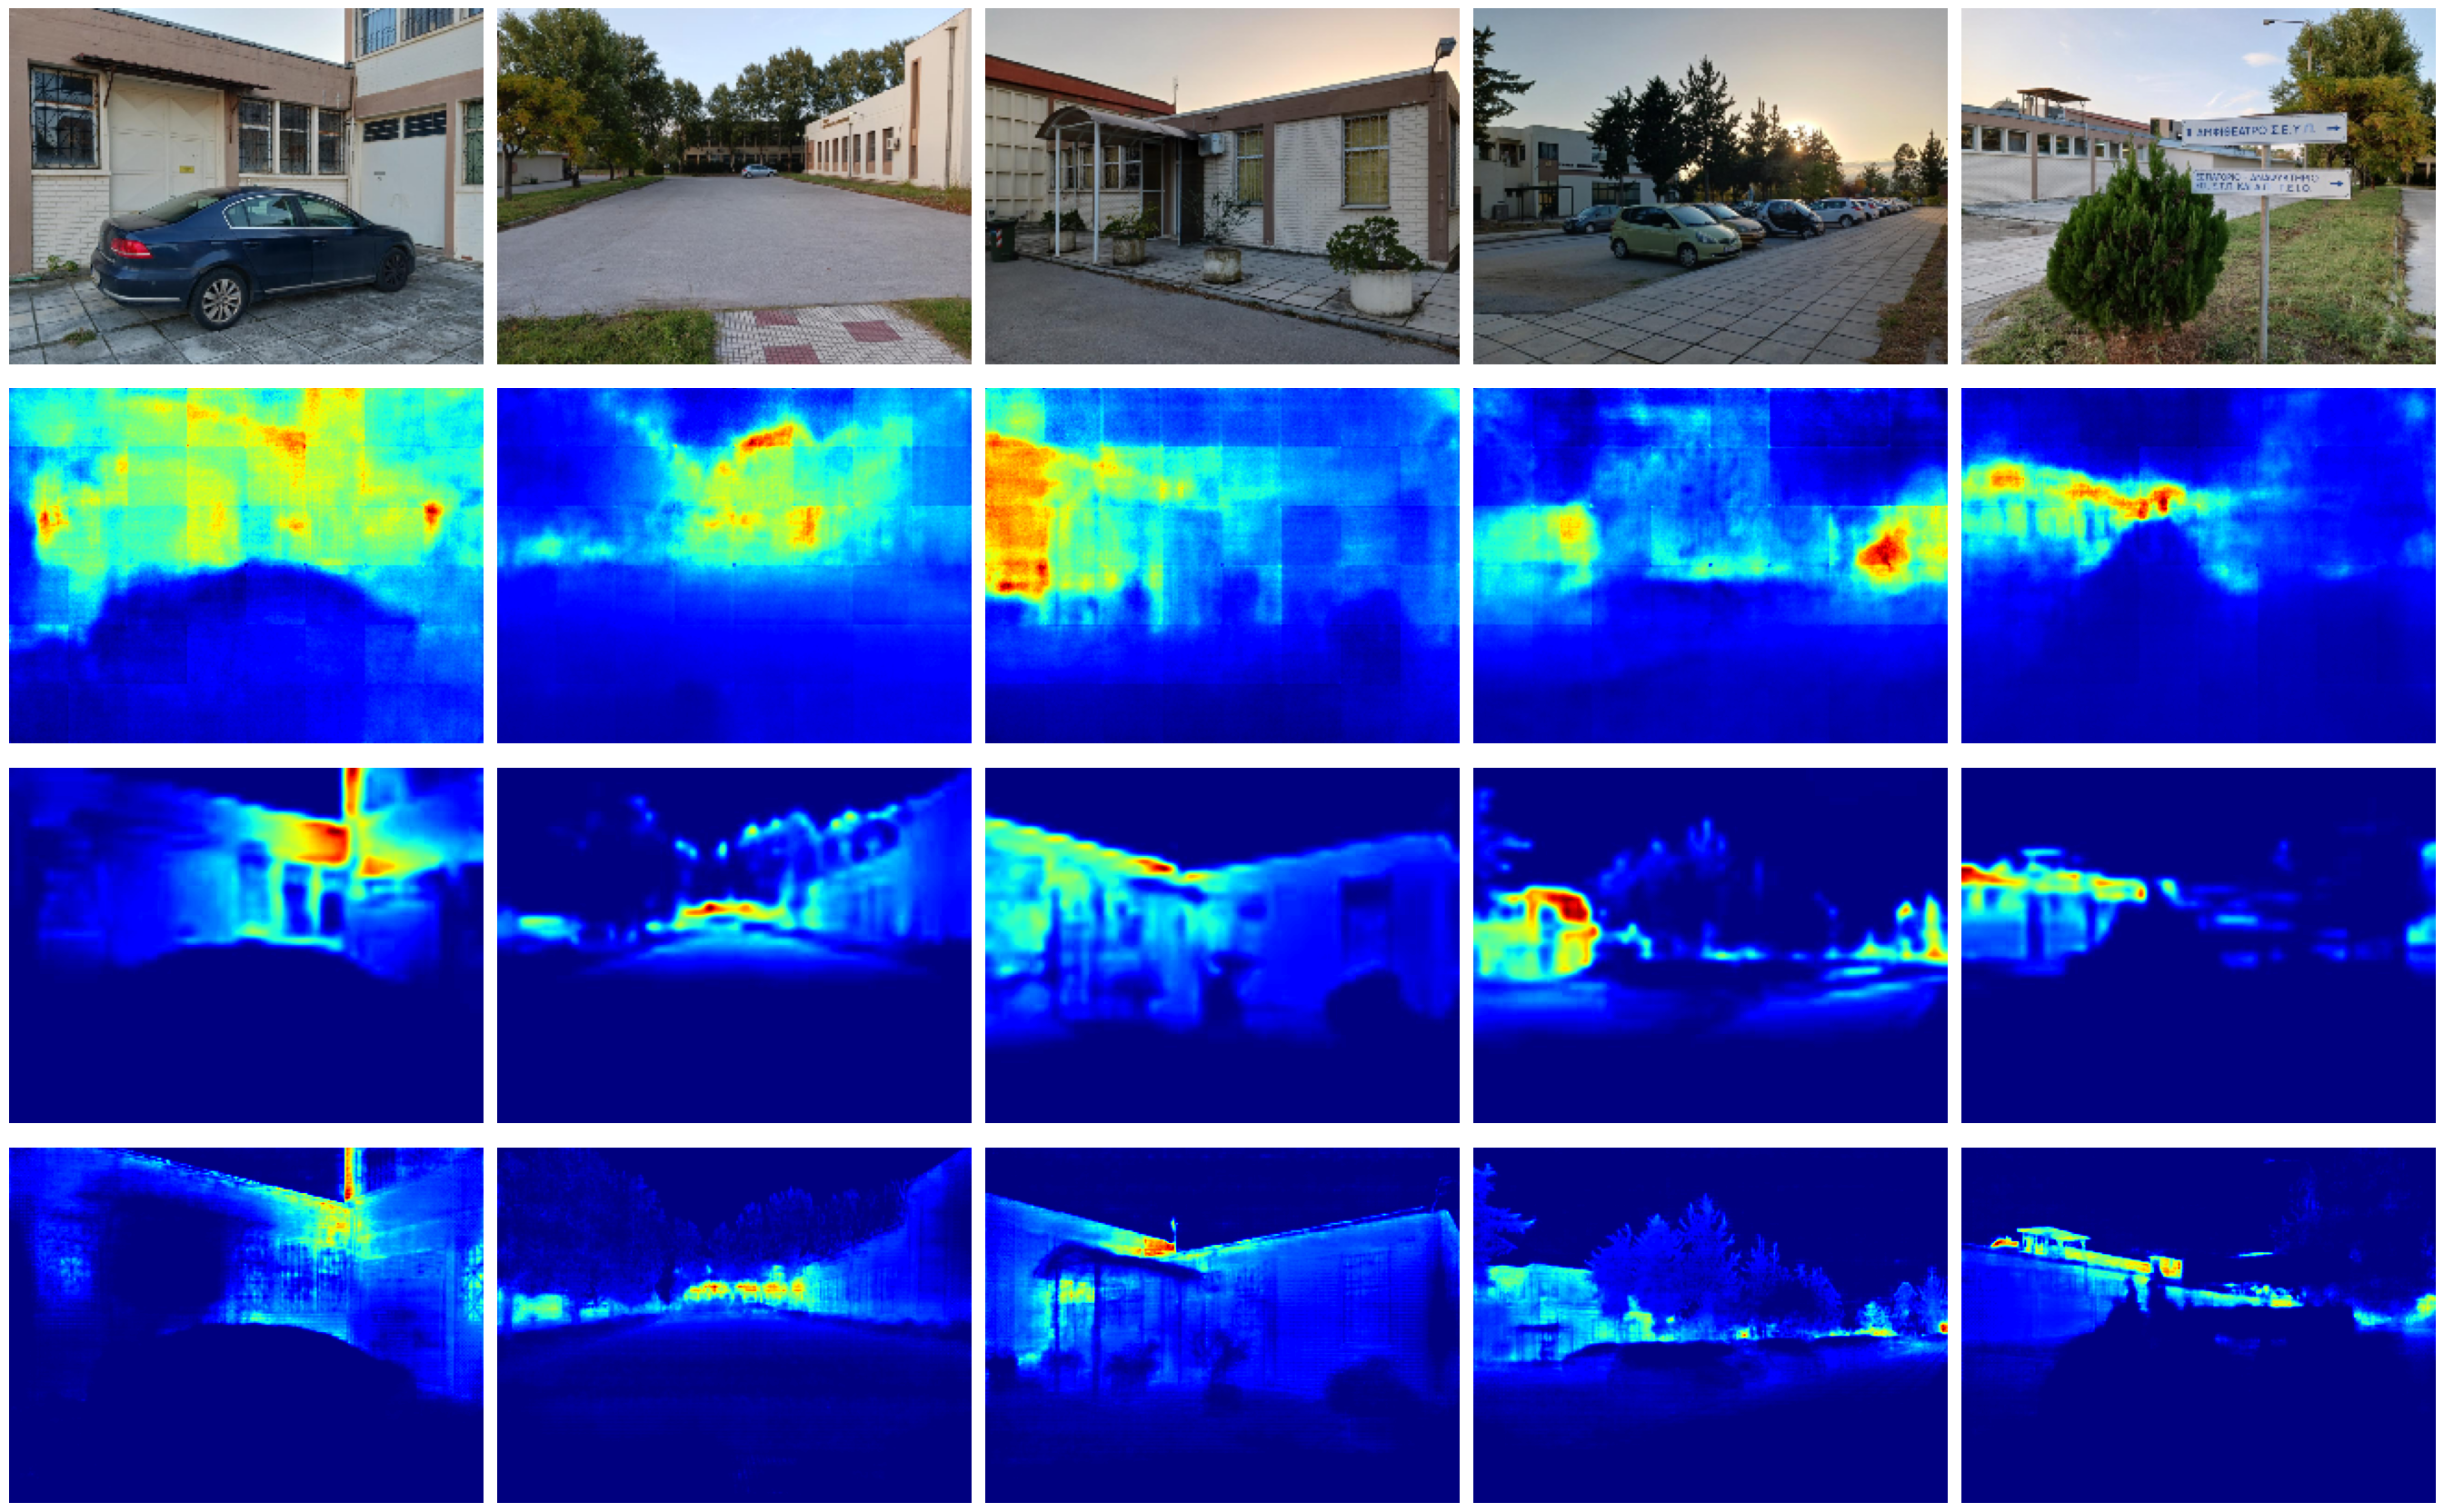

In [14]:
# prepare datasets
os.chdir('D:\\Informatics\\Μεταπτυχιακό\\Εξάμηνο Γ\\dataset\\DIPAE')
dipae = pd.read_csv('dipae.csv', header=None)
dipae.columns = ['image']
files_BANet = os.listdir('D:\\Informatics\\Μεταπτυχιακό\\Εξάμηνο Γ\\models\\BANet\\prediction\\DIPAE')
files_LapDepth = os.listdir('D:\\Informatics\\Μεταπτυχιακό\\Εξάμηνο Γ\\models\\LapDepth\\prediction\\DIPAE')
files_PixelFormer = os.listdir('D:\\Informatics\\Μεταπτυχιακό\\Εξάμηνο Γ\\models\\PixelFormer\\prediction\\DIPAE')
test = pd.DataFrame(index=range(len(files_BANet)),columns=range(4))
test.columns = ['IHU', 'BANet', 'LapDepth', 'PixelFormer']

# fill the test dataset
for i in range(len(files_BANet)):
    for j in range(len(dipae)):
        temp = dipae['image'][j].split('/')
        if temp[2][:-4] == files_BANet[i][:-4]:
            test['IHU'][i] = dipae['image'][j]
            test['BANet'][i] = '../../models/BANet/prediction/DIPAE/' + files_BANet[i]
            test['LapDepth'][i] = '../../models/LapDepth/prediction/DIPAE/'+files_LapDepth[j]
            test['PixelFormer'][i] = '../../models/PixelFormer/prediction/DIPAE/'+files_PixelFormer[j]
            break

# shuffle the test dataset
test = test.sample(frac=1)
test = test.reset_index()

# show samples
show_pred_dipae(test)

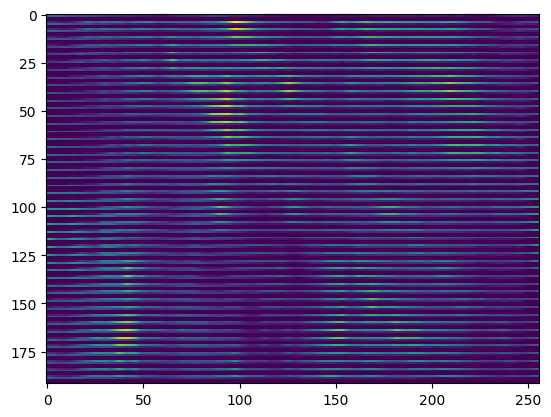

In [15]:
os.chdir('D:\\Informatics\\Μεταπτυχιακό\\Εξάμηνο Γ\\dataset')
depth = np.load('pred.npy')
#depth = np.reshape(depth, (768, 1024))
depth.resize((192, 256))
#df = pd.DataFrame(depth)
#df.to_csv('ground_truth.csv', index=False)
plt.imshow(depth, interpolation='nearest')
plt.show()
#print(depth)

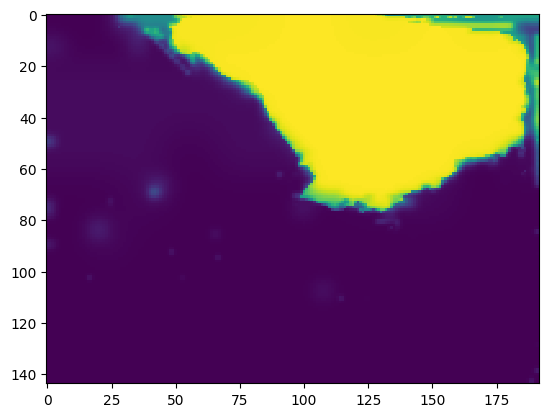

In [7]:
os.chdir('D:\\Informatics\\Μεταπτυχιακό\\Εξάμηνο Γ\\dataset')
depth = np.load('pred6.npy')
depth = np.reshape(depth, (144, 192))
#df = pd.DataFrame(depth)
#df.to_csv('prediction.csv', index=False)
plt.imshow(depth, interpolation='nearest')
plt.show()
#print(depth)

In [49]:
os.chdir('D:\\Informatics\\Μεταπτυχιακό\\Εξάμηνο Γ\\dataset')
depth2 = np.load('00022_00193_outdoor_010_010_depth.npy')
df2 = pd.DataFrame(depth2.flatten())
df2.to_csv('diode.csv', index=False)
print(depth2)

[[22.272635  26.052702  27.984318  ... 21.539366  21.326555  20.15863  ]
 [24.419334  27.076971  27.282372  ... 19.372187  21.013992  26.526127 ]
 [26.323584  26.04801   26.067099  ... 18.872566  22.23554   26.409317 ]
 ...
 [ 4.0009212  4.0931735  4.205983  ...  5.8635426  5.4930882  5.573932 ]
 [ 4.0390177  3.9046001  4.220045  ...  5.4787183  5.523669   5.1552615]
 [ 3.870092   3.9270406  4.2339745 ...  5.648932   5.324764   6.2439485]]


In [50]:
depth2 = np.reshape(depth2, (192, 256))

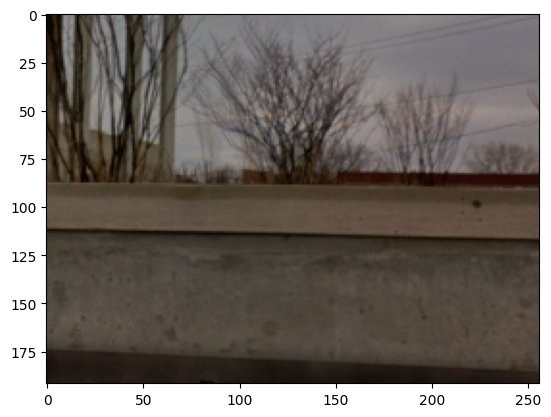

In [22]:
os.chdir('D:\\Informatics\\Μεταπτυχιακό\\Εξάμηνο Γ\\dataset\\DIODE')
df = pd.read_csv('train_outdoor.csv', header=None)
df = df.drop(df.columns[[3]], axis=1)
df.columns = ['image', 'depth', 'mask']
img=Image.open(df['image'][0])
img = img.resize((512, 384))
crop_transform = transforms.CenterCrop((192, 256))
img = crop_transform(img)
plt.imshow(img)

In [3]:
import numpy as np
data = np.load("D:\\Informatics\\Μεταπτυχιακό\\Εξάμηνο Γ\\dataset\\DIODE\\val\\outdoor\\scene_00022\\scan_00193\\00022_00193_outdoor_000_020_depth.npy")
print(np.max(data),np.min(data))

246.28806 0.0
